# `목적`: Raw Data Processing & EDA
- 마케팅 효율성
- 구매 전환률 트랜드
- 제품 간 매출 상관관계

## Summary Board
https://excalidraw.com/#json=k3XLdXHQAm6yVrn0pFm3q,M6ssrQmf_jBdyn7Dnb4mYw
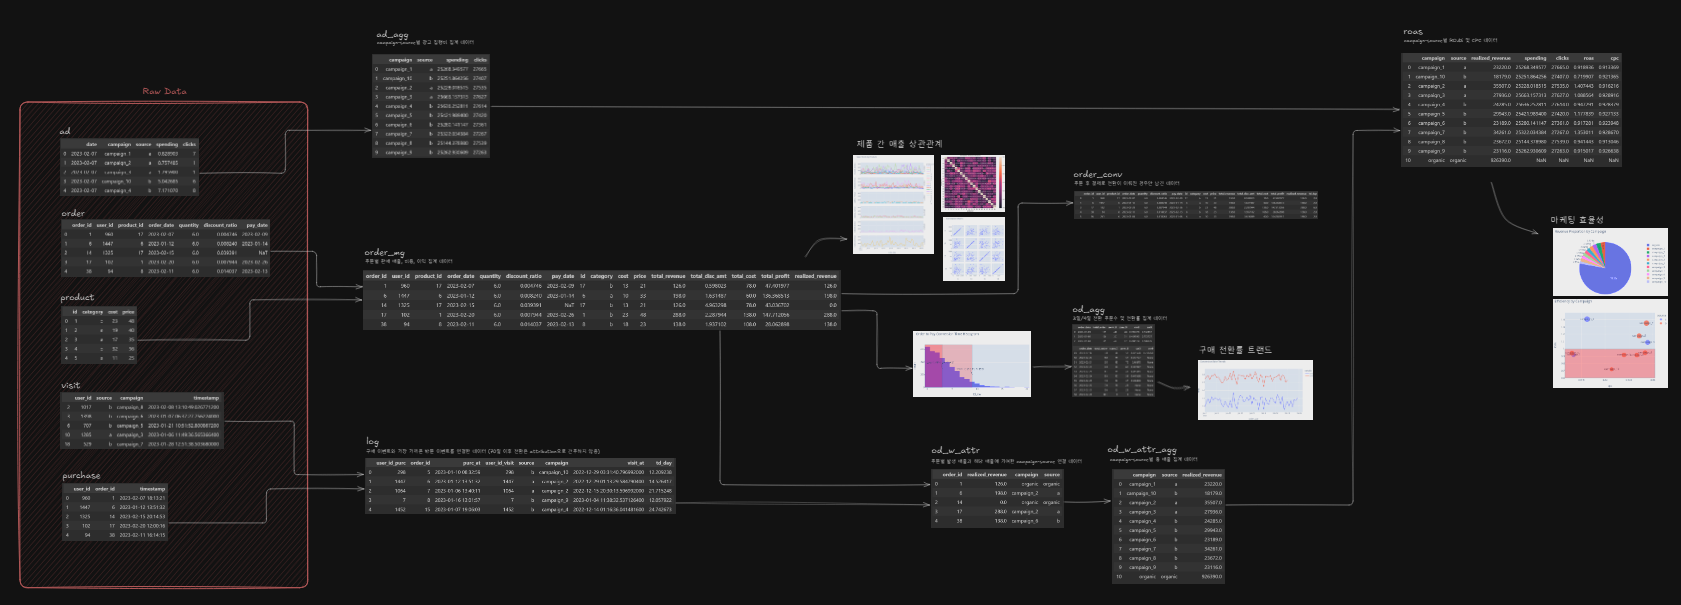

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 로드

In [2]:
ad = pd.read_csv(r'data-files\09-eda_ad.csv')
order = pd.read_csv(r'data-files\09-eda_order.csv')
product = pd.read_csv(r'data-files\09-eda_product.csv')
purchase = pd.read_csv(r'data-files\09-eda_purchase.csv')
visit = pd.read_csv(r'data-files\09-eda_visit.csv')

(1) ad

In [3]:
display(ad.head(3))
display(ad.info())

,date,campaign,source,spending,clicks
0,2023-02-07,campaign_1,a,0.828903,7
1,2023-02-07,campaign_2,a,8.757485,1
2,2023-02-07,campaign_3,a,1.795900,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      50000 non-null  object 
 1   campaign  50000 non-null  object 
 2   source    50000 non-null  object 
 3   spending  50000 non-null  float64
 4   clicks    50000 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


None

In [4]:
ad['date'] = pd.to_datetime(ad['date'])

(2) order

In [5]:
display(order.head(3))
display(order.info())

,order_id,user_id,product_id,order_date,quantity,discount_ratio,pay_date
0,1.0,960.0,17.0,2023-02-07,6.0,0.004746,2023-02-09
1,6.0,1447.0,6.0,2023-01-12,6.0,0.008240,2023-01-14
2,14.0,1325.0,17.0,2023-02-15,6.0,0.039391,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        5000 non-null   float64
 1   user_id         5000 non-null   float64
 2   product_id      5000 non-null   float64
 3   order_date      5000 non-null   object 
 4   quantity        5000 non-null   float64
 5   discount_ratio  5000 non-null   float64
 6   pay_date        3738 non-null   object 
dtypes: float64(5), object(2)
memory usage: 273.6+ KB


None

In [6]:
order['order_id'] = order['order_id'].astype(int)
order['user_id'] = order['user_id'].astype(int)
order['product_id'] = order['product_id'].astype(int)

order['order_date'] = pd.to_datetime(order['order_date'])
order['pay_date'] = pd.to_datetime(order['pay_date'])

(3) product

In [7]:
display(product.head(3))
display(product.info())

,id,category,cost,price
0,1,b,23,48
1,2,e,19,40
2,3,a,17,35


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        20 non-null     int64 
 1   category  20 non-null     object
 2   cost      20 non-null     int64 
 3   price     20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 772.0+ bytes


None

(4) purchase

In [8]:
display(purchase.head(3))
display(purchase.info())

,user_id,order_id,timestamp
0,960.0,1.0,2023-02-07 18:13:21
1,1447.0,6.0,2023-01-12 13:51:32
2,1325.0,14.0,2023-02-15 20:14:53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    4500 non-null   float64
 1   order_id   4500 non-null   float64
 2   timestamp  4500 non-null   object 
dtypes: float64(2), object(1)
memory usage: 105.6+ KB


None

In [9]:
purchase['user_id'] = purchase['user_id'].astype(int)
purchase['order_id'] = purchase['order_id'].astype(int)
purchase['timestamp'] = pd.to_datetime(purchase['timestamp'])

(5) visit

In [10]:
display(visit.head(3))
display(visit.info())

,user_id,source,campaign,timestamp
0,1017.0,NaN,NaN,2022-12-15 13:06:36.361808000
1,1017.0,NaN,NaN,2023-02-20 02:46:59.416083200
2,1017.0,b,campaign_8,2023-02-08 13:10:49.026771200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    2219 non-null   float64
 1   source     1125 non-null   object 
 2   campaign   1125 non-null   object 
 3   timestamp  2219 non-null   object 
dtypes: float64(1), object(3)
memory usage: 69.5+ KB


None

In [11]:
visit['user_id'] = visit['user_id'].astype(int)
visit['timestamp'] = pd.to_datetime(visit['timestamp'])

### Revenue & Profit

(1) order와 product를 merge

In [12]:
display(order.head(3))
display(product.head(3))

,order_id,user_id,product_id,order_date,quantity,discount_ratio,pay_date
0,1,960,17,2023-02-07,6.0,0.004746,2023-02-09
1,6,1447,6,2023-01-12,6.0,0.008240,2023-01-14
2,14,1325,17,2023-02-15,6.0,0.039391,NaT


,id,category,cost,price
0,1,b,23,48
1,2,e,19,40
2,3,a,17,35


In [13]:
# 주문 정보(order)에 제품 정보(product)를 연결(merge)
order_mg = pd.merge(order, product
                    , left_on = 'product_id'
                    , right_on = 'id'
                    , how = 'left'
                    )

# merge 결과 확인
order_mg.head()

,order_id,user_id,product_id,order_date,quantity,discount_ratio,pay_date,id,category,cost,price
0,1,960,17,2023-02-07,6.0,0.004746,2023-02-09,17,b,13,21
1,6,1447,6,2023-01-12,6.0,0.008240,2023-01-14,6,a,10,33
2,14,1325,17,2023-02-15,6.0,0.039391,NaT,17,b,13,21
3,17,102,1,2023-02-20,6.0,0.007944,2023-02-26,1,b,23,48
4,38,94,8,2023-02-11,6.0,0.014037,2023-02-13,8,b,18,23


(2) 수익 지표 계산

In [14]:
# total revenue
order_mg['total_revenue'] = order_mg['price'] * order_mg['quantity']

# total_disc_amt
order_mg['total_disc_amt'] = order_mg['total_revenue'] * order_mg['discount_ratio']

# total_cost
order_mg['total_cost'] = order_mg['cost'] * order_mg['quantity']

# total_profit
order_mg['total_profit'] = order_mg['total_revenue'] - order_mg['total_disc_amt'] - order_mg['total_cost']

# 계산 결과 확인
order_mg.head()

,order_id,user_id,product_id,order_date,quantity,discount_ratio,pay_date,id,category,cost,price,total_revenue,total_disc_amt,total_cost,total_profit
0,1,960,17,2023-02-07,6.0,0.004746,2023-02-09,17,b,13,21,126.0,0.598023,78.0,47.401977
1,6,1447,6,2023-01-12,6.0,0.008240,2023-01-14,6,a,10,33,198.0,1.631487,60.0,136.368513
2,14,1325,17,2023-02-15,6.0,0.039391,NaT,17,b,13,21,126.0,4.963298,78.0,43.036702
3,17,102,1,2023-02-20,6.0,0.007944,2023-02-26,1,b,23,48,288.0,2.287944,138.0,147.712056
4,38,94,8,2023-02-11,6.0,0.014037,2023-02-13,8,b,18,23,138.0,1.937102,108.0,28.062898


In [15]:
# 실제 결제가 이루어진 경우의 매출만 별도 컬럼으로 추출
# (pay_date가 NaT가 아닌 경우)
order_mg['realized_revenue'] = np.where(order_mg['pay_date'].isna(), 0, order_mg['total_revenue'])

### Last Click Attribution

(1) purchase와 visit을 merge

In [16]:
# campaign 정보가 있는 방문 이벤트 필터링
con = ~visit['campaign'].isna()
visit = visit[con]

In [17]:
display(purchase.head())
display(visit.head())

,user_id,order_id,timestamp
0,960,1,2023-02-07 18:13:21
1,1447,6,2023-01-12 13:51:32
2,1325,14,2023-02-15 20:14:53
3,102,17,2023-02-20 12:00:16
4,94,38,2023-02-11 16:14:15


,user_id,source,campaign,timestamp
2,1017,b,campaign_8,2023-02-08 13:10:49.026771200
3,1398,b,campaign_6,2023-01-07 06:37:27.756224000
6,707,b,campaign_5,2023-01-21 10:51:52.800867200
10,1285,a,campaign_3,2023-01-06 11:49:36.565366400
18,529,b,campaign_7,2023-01-28 12:51:38.503680000


In [18]:
# 구매 정보(purchase)와 방문 정보(visit)의 모든 조합을 연결(cross merge)
log_mg = pd.merge(purchase, visit
                  , how='cross'
                  )

# merge 결과 확인
log_mg.head()

,user_id_x,order_id,timestamp_x,user_id_y,source,campaign,timestamp_y
0,960,1,2023-02-07 18:13:21,1017,b,campaign_8,2023-02-08 13:10:49.026771200
1,960,1,2023-02-07 18:13:21,1398,b,campaign_6,2023-01-07 06:37:27.756224000
2,960,1,2023-02-07 18:13:21,707,b,campaign_5,2023-01-21 10:51:52.800867200
3,960,1,2023-02-07 18:13:21,1285,a,campaign_3,2023-01-06 11:49:36.565366400
4,960,1,2023-02-07 18:13:21,529,b,campaign_7,2023-01-28 12:51:38.503680000


In [19]:
# 구분을 위해 컬럼명 변경
log_mg.rename(columns={
    'user_id_x':'user_id_purc'
    , 'user_id_y':'user_id_visit'
    , 'timestamp_x':'purc_at'
    , 'timestamp_y':'visit_at'
}, inplace=True)

(2) Last Click Attribution 확인을 위한 필터링

In [20]:
# 구매 유저와 방문 유저가 동일한 경우만 남김
con = log_mg['user_id_purc'] == log_mg['user_id_visit']
log_mg = log_mg[con]

In [21]:
# 구매 시점 이전의 방문 기록만 남김
con = log_mg['purc_at'] >= log_mg['visit_at']
log_mg = log_mg[con]

In [22]:
# Attribution window = 70일 이내의 기록만 남김
log_mg['td_day'] = (log_mg['purc_at'] - log_mg['visit_at']).dt.total_seconds() / (3600 * 24)

con = log_mg['td_day'] <= 70
log = log_mg[con]

In [23]:
# cross join 기준으로 생성된 인덱스 초기화
log.reset_index(inplace=True, drop=True)

In [24]:
# 각 주문별 가장 가까운 방문 기록만 남김
log = log.loc[log.groupby('order_id')['td_day'].idxmin()].reset_index(drop=True)

In [25]:
# 집계 결과 확인
log.head()

,user_id_purc,order_id,purc_at,user_id_visit,source,campaign,visit_at,td_day
0,298,5,2023-01-10 08:32:59,298,b,campaign_10,2022-12-29 03:31:40.796992000,12.209238
1,1447,6,2023-01-12 13:51:32,1447,a,campaign_2,2022-12-29 01:13:29.584790400,14.526417
2,1064,7,2023-01-06 13:40:11,1064,a,campaign_2,2022-12-15 20:30:13.596992000,21.715248
3,7,8,2023-01-16 13:01:57,7,b,campaign_9,2023-01-04 11:38:32.537126400,12.057922
4,1452,15,2023-01-07 19:06:03,1452,b,campaign_4,2022-12-14 01:16:36.041481600,24.742673


### ROAS 

In [26]:
# 주문 집계 데이터(order_mg)와 70일 이내 attribution campaign을 연결(left merge)
od_w_attr = pd.merge(order_mg[['order_id', 'realized_revenue']]
                     , log[['order_id', 'campaign', 'source']]
                     , on = 'order_id'
                     , how='left'
                     )

In [27]:
# 집계를 위해 campaign - source 결측치를 organic으로 처리
od_w_attr.fillna({
    'campaign':'organic'
    , 'source':'organic'
}, inplace=True)

In [28]:
# 각 campaign-source 별 총매출 집계
od_w_attr_agg = od_w_attr.groupby(['campaign', 'source'])['realized_revenue'].sum().reset_index()

In [29]:
# campaign 및 source 별 광고 집행비 집계
ad_agg = ad.groupby(['campaign', 'source'])[['spending', 'clicks']].sum().reset_index()

In [30]:
# campaign 및 source 별 매출 데이터(od_w_attr_agg)와 비용 데이터(ad_agg)를 연결
roas = pd.merge(od_w_attr_agg, ad_agg
         , on=['campaign', 'source']
         , how='left'
         )

# campaign 및 source 별 ROAS 및 CPC 계산
roas['roas'] = roas['realized_revenue'] / roas['spending']
roas['cpc'] = roas['spending'] / roas['clicks']

In [31]:
# 결과 확인
roas

,campaign,source,realized_revenue,spending,clicks,roas,cpc
0,campaign_1,a,23220.0,25268.349577,27665.0,0.918936,0.913369
1,campaign_10,b,18179.0,25251.864256,27407.0,0.719907,0.921365
2,campaign_2,a,35507.0,25228.018515,27535.0,1.407443,0.916216
3,campaign_3,a,27936.0,25663.157313,27627.0,1.088564,0.928916
4,campaign_4,b,24285.0,25636.252811,27614.0,0.947291,0.928379
5,campaign_5,b,29943.0,25421.989400,27420.0,1.177839,0.927133
6,campaign_6,b,23189.0,25280.141147,27361.0,0.917281,0.923948
7,campaign_7,b,34261.0,25322.034384,27267.0,1.353011,0.928670
8,campaign_8,b,23672.0,25144.378980,27539.0,0.941443,0.913046
9,campaign_9,b,23116.0,25262.930609,27263.0,0.915017,0.926638


In [32]:
# 유입 경로별 매출 비율 시각화
fig = px.pie(
    roas
    , names='campaign'
    , values='realized_revenue'
    , title='Revenue Proportion by Campaign'
)
fig.show()

In [71]:
# campaign별 효율성 시각화
fig = px.scatter(
    roas[roas['campaign']!='organic'] # organic 제외
    , x='cpc'
    , y='roas'
    , height=500, width=600
    , size='realized_revenue'
    , color='source'
    , text='campaign'
    , title='Efficiency by Campaign'
)

fig.add_hrect(y0=0.6, y1=1, fillcolor='red', opacity=.3)

fig.show()

### Order to Pay Conversion

(1) Conversion Window 설정

In [34]:
# 주문 후 결제까지 걸린 전환 시간 계산
order_mg['td_day'] =  (order_mg['pay_date'] - order_mg['order_date']).dt.total_seconds() / (3600*24)

In [35]:
# 결제 전환이 이뤄진 경우만 남김
order_conv = order_mg[~order_mg['td_day'].isna()].reset_index(drop=True)

In [83]:
# Conversion Window 설정을 위한 전환 시간 히스토그램
fig = px.histogram(
    order_conv
    , x='td_day'
    , height=400, width=700
    , title='Order to Pay Conversion Time Histogram'
)

# 50% 및 95% 지점 표시
p_50 = np.percentile(order_conv['td_day'], 50)
p_95 = np.percentile(order_conv['td_day'], 95)

fig.add_vrect(x0=-.5, x1=p_50, fillcolor='red', opacity=.2)
fig.add_annotation(x=p_50, y=300, text=f'50%의 전환이 {p_50:.0f}일 내 발생')
fig.add_vrect(x0=-.5, x1=p_95, fillcolor='red', opacity=.2)
fig.add_annotation(x=p_95, y=200, text=f'95%의 전환이 {p_95:.0f}일 내 발생')

fig.show()

(2) 3일/9일 전환 분석

In [37]:
# 3일/9일 전환의 경우를 표시
order_mg['conv_3'] = np.where(order_mg['td_day']<=3, 1, None)
order_mg['conv_9'] = np.where(order_mg['td_day']<=9, 1, None)

In [38]:
# 데이터 수집 종료일 확인
display(order_mg['order_date'].max())       # Timestamp('2023-02-28 00:00:00')
display(order_mg['pay_date'].max())         # Timestamp('2023-02-28 00:00:00')

# => CW=3일의 경우 25일까지만, CW=9일의 경우 19일까지만 신뢰 가능

Timestamp('2023-02-28 00:00:00')

Timestamp('2023-02-28 00:00:00')

In [39]:
# 전체 주문수, 3일내 전환 주문수, 9일내 전환 주문수 집계
od_agg = order_mg.groupby('order_date')[['order_id', 'conv_3', 'conv_9']].count().reset_index()

od_agg.rename(columns={
    'order_id':'total_order'
}, inplace=True)

In [41]:
# 전체 주문에서 3일/9일 이내 전환의 비율 계산 (신뢰구간 고려)
od_agg['cvr3'] = od_agg['conv_3'] / od_agg['total_order']
od_agg['cvr3'] = np.where(od_agg['order_date']<='2023-02-25', od_agg['cvr3'], None)
od_agg['cvr9'] = od_agg['conv_9'] / od_agg['total_order']
od_agg['cvr9'] = np.where(od_agg['order_date']<='2023-02-19', od_agg['cvr9'], None)

In [42]:
# 계산 결과 확인
display(od_agg.head(3))
display(od_agg.tail(10))

,order_date,total_order,conv_3,conv_9,cvr3,cvr9
0,2023-01-01,105,41,78,0.390476,0.742857
1,2023-01-02,66,30,51,0.454545,0.772727
2,2023-01-03,85,42,67,0.494118,0.788235


,order_date,total_order,conv_3,conv_9,cvr3,cvr9
49,2023-02-19,78,36,57,0.461538,0.730769
50,2023-02-20,88,35,57,0.397727,None
51,2023-02-21,96,45,72,0.46875,None
52,2023-02-22,93,36,60,0.387097,None
53,2023-02-23,81,39,45,0.481481,None
54,2023-02-24,85,40,51,0.470588,None
55,2023-02-25,73,37,37,0.506849,None
56,2023-02-26,79,28,28,None,None
57,2023-02-27,96,23,23,None,None
58,2023-02-28,101,8,8,None,None


(3) 트랜드 시각화

In [74]:
# 시간에 따른 전환율 시각화
fig = px.line(
    od_agg
    , x='order_date'
    , y=['cvr3', 'cvr9']
    , title='Conversion Rate Trends'
    , height=500, width=900
)

fig.show()

### Sales Trend by Product Category

In [59]:
# 제품별 매출 집계
sales_trends = order_mg.groupby(['order_date', 'category', 'product_id'])['realized_revenue'].sum().reset_index()

In [75]:
# 주문일에 따른 제품별 매출 트랜드 시각화
fig = px.line(
    sales_trends
    , x='order_date'
    , y='realized_revenue'
    , color='product_id'
    , facet_row = 'category'
    , height=1000, width=800
    , title='Sales Trends by Products'
)

fig.show()

### Correlation Between Sales Trends and Products

In [63]:
# 제품별 매출 피봇테이블 집계
sales_trends_pivot = sales_trends.pivot_table(
    index='order_date'
    , columns='product_id'
    , values='realized_revenue'
)

sales_trends_pivot.head()

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
order_date,,,,,,,,,,,,,,,,,,,,
2023-01-01,3936.0,440.0,1645.0,1456.0,600.0,1650.0,3055.0,437.0,1806.0,559.0,625.0,1088.0,1276.0,2934.0,1462.0,720.0,630.0,390.0,1240.0,2387.0
2023-01-02,3552.0,80.0,1295.0,672.0,425.0,165.0,1128.0,345.0,2537.0,0.0,175.0,544.0,783.0,1630.0,903.0,495.0,210.0,104.0,620.0,806.0
2023-01-03,384.0,480.0,875.0,336.0,950.0,825.0,1739.0,253.0,989.0,301.0,525.0,748.0,1334.0,326.0,903.0,225.0,966.0,546.0,3596.0,2449.0
2023-01-04,3840.0,280.0,1050.0,2744.0,400.0,495.0,1504.0,0.0,1462.0,774.0,500.0,204.0,319.0,1304.0,903.0,900.0,147.0,598.0,2914.0,2604.0
2023-01-05,1536.0,360.0,1260.0,280.0,150.0,495.0,1739.0,621.0,903.0,215.0,575.0,544.0,1015.0,1956.0,1806.0,180.0,189.0,208.0,1550.0,806.0


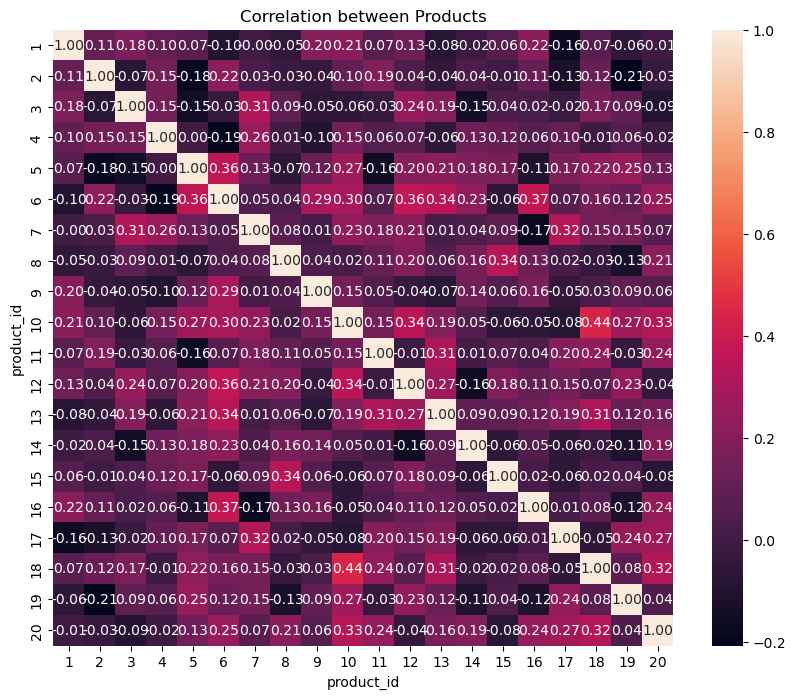

In [77]:
# 날짜별 매출의 변동 패턴이 닮은 제품 파악
corr = sales_trends_pivot.corr()

# 히트맵 시각화
plt.figure(figsize=(10,8))
sns.heatmap(corr
            , annot=True
            , fmt='.2f'
            )

plt.title('Correlation between Products')
plt.show()

In [82]:
# 10번-18번 => 0.44
# 6번-16번 => 0.37

# 매트릭스 시각화
fig = px.scatter_matrix(
    sales_trends_pivot[[6, 10, 16, 18]]
    , opacity=.5
    , title='Correlation Matrix'
    , height=600, width=600
)

fig.show()